In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns = ['target'])

In [6]:
#Normalizing X; Y is already only 3 distinct values
X = (X - X.min()) / (X.max() - X.min())

In [7]:
##splitting the dataset into Train and Test
##not required in KNN, because we are doing this to understand 
##if we can predict for new values that do not already exist in the data

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
f1 = "worst fractal dimension"
f2 = "mean radius"
f3 = "worst concave points"
f4 = "symmetry error"
basex = np.array(xtrain[[f1, f2, f3, f4]])
basey = np.array(ytrain['target'])

xtest = np.array(xtest[[f1, f2, f3, f4]])
ytest = np.array(ytest['target'])

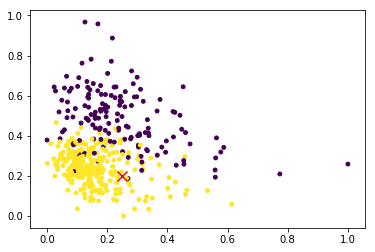

In [11]:
x = pd.DataFrame(basex)
y = basey

plt.scatter(x.iloc[ :, 0], x.iloc[ :, 1], c = y, s = 15)
plt.scatter(0.25, 0.2, c = 'red', marker = 'x', s = 100)

In [12]:
#calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point - given_point) ** 2)
    return np.sqrt(distance)

In [13]:
#calculate distance from a given point to all other points
#and keep track of the respective classes for those distances
#and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance, int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances

In [14]:
#get the defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[ :count]

In [15]:
#takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points, given_point, predictions)
    neighbours = get_neighbours(distances, 4)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key = op.count)
    return prediction

In [16]:
#get how accurate our system is based on a new set of points
#for which we already know the right answer to
def accuracy(basex, basey, xtest, ytest):
    correct = 0
    
    for i in range(len(xtest)):
        p = predict(basex, xtest[i], basey)
        if p == ytest[i]:
            correct += 1 
            
    return f"Accuracy: {correct * 100 / len(ytest)} % "    

In [17]:
print(accuracy(basex, basey, xtest, ytest))

Accuracy: 95.90643274853801 % 
